#              Отчёт о выполненном задании №2 по практикуму на ЭВМ 


## Павел Афанасьев , 317

## Содержание

**1. Постановка задачи** 

**2. Эксперименты**

**3. Вывод**

## 1  Постановка задачи

В данном задании требовалось ознакомиться с метрическими методами классификации, а также методами
работы с текстовой информацией и изображениями. Требовалось :
* Написать на языке Python3 функции для собственной реализации метода ближайших соседей и кросс-валидации, используя при этом только стандартные средства языка Python3 и библиотеки numpy и matplotlib. 
* Провести эксперименты с датасетами MNIST и 20newsgroups.
* Написать отчёт в IPython Notebook.
* Выявить наилучший алгоритм на экспериментах и применить к исходным выборкам.

## 2  Эксперименты

In [2]:
import nearest_neighbors
import cross_validation
from sklearn.neighbors import NearestNeighbors
import sklearn.datasetss
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [3]:
#Task1,2
buf=sklearn.datasets.fetch_mldata("MNIST original")
data=buf['data']
ans=buf['target']
train=data[:60000,:]
y=ans[:60000]
test=data[60000:70000,:]

Визуализировал по 5 объектов из каждого класса

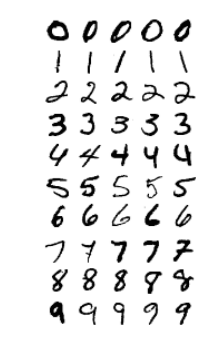

In [4]:
#Task3
image=None
for i in range(0,10):
    y_cur=np.where(y == i)[0]
    np.random.shuffle(y_cur)
    cur_image=None
    for j in range(0,5):
        if (cur_image is None):
            cur_image=train[y_cur[j]].reshape(28,28)
        else:
            cur_image=np.concatenate((cur_image,train[y_cur[j]].reshape(28,28)),axis=1)
    if (image is None):
        image=cur_image
    else:
        image=np.concatenate((image,cur_image),axis=0)
plt.axis("off")
plt.imshow(image,cmap='Greys')
plt.show()

In [5]:
#Task4
buf=sklearn.datasets.fetch_mldata("MNIST original")
data=buf['data']
ans=buf['target']
train=data[:20000,:]
y=ans[:20000]
test=data[60000:70000,:]

In [68]:
#Task4
k=np.random.randint(784,size=(10))
length=len(k)

In [69]:
#Task4
for j in ["False","True"]:
    for i in ["brute","kd_tree","ball_tree","my_own"]:
        classifier=nearest_neighbors.KNN_classifier(k=5,strategy=i,metric="euclidean",test_block_size=20,weights=j)
        train1=train[:,k]
        test1=test[:,k]
        classifier.fit(train1,y)
        start = time.clock()
        classifier.find_kneighbors(test1,True)
        print ("time =",time.clock() - start,", strategy:",i,", features =",length,", weights:",j)
    print()

time = 4.9711509999999635 , strategy: brute , features = 10 , weights: False
time = 0.4081130000000712 , strategy: kd_tree , features = 10 , weights: False
time = 0.6135819999999512 , strategy: ball_tree , features = 10 , weights: False
time = 18.072082999999907 , strategy: my_own , features = 10 , weights: False

time = 4.929164000000014 , strategy: brute , features = 10 , weights: True
time = 0.40358500000002095 , strategy: kd_tree , features = 10 , weights: True
time = 0.6138460000000805 , strategy: ball_tree , features = 10 , weights: True
time = 19.928127000000018 , strategy: my_own , features = 10 , weights: True



In [70]:
#Task4
k=np.random.randint(784,size=(20))
length=len(k)

In [71]:
#Task4
for j in ["False","True"]:
    for i in ["brute","kd_tree","ball_tree","my_own"]:
        classifier=nearest_neighbors.KNN_classifier(k=5,strategy=i,metric="euclidean",test_block_size=20,weights=j)
        train1=train[:,k]
        test1=test[:,k]
        classifier.fit(train1,y)
        start = time.clock()
        classifier.find_kneighbors(test1,True)
        print ("time =",time.clock() - start,", strategy:",i,", features =",length,", weights:",j)
    print()

time = 5.032686000000012 , strategy: brute , features = 20 , weights: False
time = 1.2983090000000175 , strategy: kd_tree , features = 20 , weights: False
time = 3.1733840000000555 , strategy: ball_tree , features = 20 , weights: False
time = 28.817830000000072 , strategy: my_own , features = 20 , weights: False

time = 5.039131999999995 , strategy: brute , features = 20 , weights: True
time = 1.2182299999999486 , strategy: kd_tree , features = 20 , weights: True
time = 3.1601699999999937 , strategy: ball_tree , features = 20 , weights: True
time = 27.77157699999998 , strategy: my_own , features = 20 , weights: True



In [72]:
#Task4
k=np.random.randint(784,size=(100))
length=len(k)

In [73]:
#Task4
for j in ["False","True"]:
    for i in ["brute","kd_tree","ball_tree","my_own"]:
        classifier=nearest_neighbors.KNN_classifier(k=5,strategy=i,metric="euclidean",test_block_size=20,weights=j)
        train1=train[:,k]
        test1=test[:,k]
        classifier.fit(train1,y)
        start = time.clock()
        classifier.find_kneighbors(test1,True)
        print ("time =",time.clock() - start,", strategy:",i,", features =",length,", weights:",j)
    print()

time = 5.394972999999936 , strategy: brute , features = 100 , weights: False
time = 34.19417999999996 , strategy: kd_tree , features = 100 , weights: False
time = 35.918867999999975 , strategy: ball_tree , features = 100 , weights: False
time = 89.73731699999996 , strategy: my_own , features = 100 , weights: False

time = 5.379781999999977 , strategy: brute , features = 100 , weights: True
time = 34.611297000000036 , strategy: kd_tree , features = 100 , weights: True
time = 35.02185399999996 , strategy: ball_tree , features = 100 , weights: True
time = 86.74642599999993 , strategy: my_own , features = 100 , weights: True



Требовалось протестировать написанные алгоритмы на выборке MNIST  при различных параметрах, замерить время работы и выявить самый быстрый.Данные в таблице измерялись в секундах(s). **Weights** означает взвешенный ли методы был, **Volume** - количество признаков.

| Weights | Volume | brute | kd_tree | ball_tree | my_own|
|:----------- |:----------- |:----------- |:-----------|:-----------|
| False       | features=10       |4.97|0.40|0.61|18.07|
| False       | features=20       |5.30|1.29|3.17|28.81|
| False       | features=100       |5.39|34.19|35.91|89.73|
| True       | features=10       |4.92|0.40|0.61|19.92|
| True       | features=20       |5.03|1.21|3.16|27.7|
| True       | features=100       |5.37|34.61|35.02|86.74|

Исходя из значений приведенных в таблице можно сделать вывод, что скорость алгоритма "brute" относительно не зависит от количества признаков, самым длительным оказалась метод "my_own", на маленьком объеме признаков лучше всего использовать стратегию "kd_tree", веса фактически не влияют на скорость алгоритмов соотвественно. 

Покажем, что точность на кросс-валидации на алгоритмах "brute" и "my_own" совпадают.

In [4]:
#Notask
train=data[21000:25000,:]
y=ans[21000:25000]

In [5]:
#Notask
a={}
for k in ["euclidean","cosine"]:
    a[k]=cross_validation.knn_cross_val_score(train,y,[1,2,3,4,5,6,7,8,9,10],score="accuracy",cv=cross_validation.kfold(train.shape[0],3),weights=False,metric=k,strategy="my_own",test_block_size=20)

In [5]:
#Notask
b={}
for k in ["euclidean","cosine"]:
    b[k]=cross_validation.knn_cross_val_score(train,y,[1,2,3,4,5,6,7,8,9,10],score="accuracy",cv=cross_validation.kfold(train.shape[0],3),weights=False,metric=k,strategy="brute",test_block_size=20)

In [7]:
#Notask
for i in range(1,10):
    sumacos=np.sum(a['cosine'][i]==b['cosine'][i])/3
    sumaeuc=np.sum(a['euclidean'][i]==b['euclidean'][i])/3
    print(sumacos,sumaeuc)

1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0


In [8]:
#Notask
c={}
for k in ["euclidean","cosine"]:
    c[k]=cross_validation.knn_cross_val_score(train,y,[1,2,3,4,5,6,7,8,9,10],score="accuracy",cv=cross_validation.kfold(train.shape[0],3),weights=True,metric=k,strategy="brute",test_block_size=20)
d={}
for k in ["euclidean","cosine"]:
    d[k]=cross_validation.knn_cross_val_score(train,y,[1,2,3,4,5,6,7,8,9,10],score="accuracy",cv=cross_validation.kfold(train.shape[0],3),weights=True,metric=k,strategy="my_own",test_block_size=20)

In [9]:
#Notask
for i in range(1,10):
    sumacos=np.sum(c['cosine'][i]==d['cosine'][i])/3
    sumaeuc=np.sum(c['euclidean'][i]==d['euclidean'][i])/3
    print(sumacos,sumaeuc)

1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0


Так как скорость алгоритма "brute" быстрее, я воспользуюсь им в дальшнейших экспериментах.

In [4]:
#Task5
train=data[:60000,:]
y=ans[:60000]

In [ ]:
#Task5
for k in ["euclidean","cosine"]:
    start=time.clock()
    e=cross_validation.knn_cross_val_score(train,y,[1,2,3,4,5,6,7,8,9,10],score="accuracy",cv=cross_validation.kfold(train.shape[0],3),weights=False,metric=k,strategy="brute",test_block_size=20)
    print("time =",time.clock()-start)
    for i in e:
        mean=np.sum(e[i])/len(e[i])
        print("k =",i,k,"mean =",mean)

time = 177.80907100000002
k = 1 euclidean mean = 0.969916666667
k = 2 euclidean mean = 0.9621
k = 3 euclidean mean = 0.96945
k = 4 euclidean mean = 0.96795
k = 5 euclidean mean = 0.969066666667
k = 6 euclidean mean = 0.967783333333
k = 7 euclidean mean = 0.967766666667
k = 8 euclidean mean = 0.966533333333
k = 9 euclidean mean = 0.966016666667
k = 10 euclidean mean = 0.964416666667
time = 167.160822
k = 1 cosine mean = 0.973766666667
k = 2 cosine mean = 0.969066666667
k = 3 cosine mean = 0.97395
k = 4 cosine mean = 0.97305
k = 5 cosine mean = 0.97265
k = 6 cosine mean = 0.97215
k = 7 cosine mean = 0.971133333333
k = 8 cosine mean = 0.97105
k = 9 cosine mean = 0.9702
k = 10 cosine mean = 0.969783333333


In [ ]:
#Task6
for k in ["euclidean"]:
    start=time.clock()
    a=cross_validation.knn_cross_val_score(train,y,[1,2,3,4,5,6,7,8,9,10],score="accuracy",cv=cross_validation.kfold(train.shape[0],3),weights=True,metric=k,strategy="brute",test_block_size=20)
    print("time =",time.clock()-start)
    for i in a:
        mean=np.sum(a[i])/len(a[i])
        print("k =",i,k,"mean =",mean,"weights on")

time = 182.95460199999997
k = 1 euclidean mean = 0.970016666667 weights on
k = 2 euclidean mean = 0.970016666667 weights on
k = 3 euclidean mean = 0.9703 weights on
k = 4 euclidean mean = 0.9713 weights on
k = 5 euclidean mean = 0.969383333333 weights on
k = 6 euclidean mean = 0.969983333333 weights on
k = 7 euclidean mean = 0.96815 weights on
k = 8 euclidean mean = 0.968466666667 weights on
k = 9 euclidean mean = 0.966666666667 weights on
k = 10 euclidean mean = 0.966683333333 weights on


In [ ]:
#Task6
for k in ["cosine"]:
    start=time.clock()
    e=cross_validation.knn_cross_val_score(train,y,[1,2,3,4,5,6,7,8,9,10],score="accuracy",cv=cross_validation.kfold(train.shape[0],3),weights=True,metric=k,strategy="brute",test_block_size=20)
    print("time =",time.clock()-start)
    for i in e:
        mean=np.sum(e[i])/len(e[i])
        print("k =",i,k,"mean =",mean)

time = 180.406856
k = 1 cosine mean = 0.973116666667
k = 2 cosine mean = 0.973116666667
k = 3 cosine mean = 0.9744
k = 4 cosine mean = 0.975116666667
k = 5 cosine mean = 0.973866666667
k = 6 cosine mean = 0.974433333333
k = 7 cosine mean = 0.97265
k = 8 cosine mean = 0.972666666667
k = 9 cosine mean = 0.9711
k = 10 cosine mean = 0.97165


Нужно было сравнить по кросс-валидации точность и скорость метода k ближайщих соседей при разных параметрах. Использовался алгоритм "brute", так как он является самым быстрым из всех имеющихся в задании. Данные в таблице показывают точность. **Weights** означает взвешенный ли методы был, **Time** - время, за которое выполнил алгоритм, **Metric** - использовавшася метрика.

|Time| Weights | Metric | k=1 |k=2|k=3|k=4|k=5|k=6|k=7|k=8|k=9|k=10|
|:-----------: |:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
|177.80s| False       | Euclidean       | 0.9699       |0.9621|0.9694|0.9679|0.9690|0.9677|0.9677|0.9665|0.9660|0.9644|
|167.16s| False       | Cosine       | 0.9737       |0.9690|0.9739|0.9730|0.9726|0.9721|0.9711|0.9710|0.9702|0.9697|
|182.95s|   True     | Euclidean       | 0.9700       |0.9700|0.9703|0.9713|0.9693|0.9699|0.9681|0.9684|0.9666|0.9666|
|180.40s| True       | Cosine       | 0.9731       |0.9731|0.9744|0.9751|0.9738|0.9744|0.9726|0.9726|0.9711|0.9716|

На евклидовой метрике с "выключенными" весами лучшая точность достиглась при k=1, а на косинусной при k=3, также можно заметить что при k>4 она постепенно ухудшалась у обоих. Но все же, лучше показала себя косинусная метрика, как по времени, так и по точности. Взвешанный метод замедлил на маленькую долю времени обе метрики, но при этом увеличил их точность

Исходя из вышепроделанных рассуждений и по результатам таблицы лучшим алгоритмом для контрольной выборки MNIST оказался "brute" при параметрах: k=4, metric="cosine", weights=True.

In [7]:
#Task7
train=data[:60000,:]
y=ans[:60000]
test=data[60000:70000,:]
answers=ans[60000:70000]

In [8]:
#Task7
classifier=nearest_neighbors.KNN_classifier(k=4,strategy="brute",metric="cosine",test_block_size=20,weights=True)
classifier.fit(train,y)
y_pred=classifier.predict(test)

In [81]:
#Task7
np.sum(y_pred==answers)/len(y_pred)

0.97519999999999996

Точность оказалась 0.97519, что практически совпадает с точностью на кросс-валидации(до десятитысячной).
В [Посте на хабре](https://habrahabr.ru/post/274725/) лучший результат - 0.9963.

In [24]:
#Task8
confusion_matrix(answers, y_pred)

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    3,    1,    0,    0,    2,    0,    0,    0],
       [   8,    0, 1009,    1,    1,    0,    0,    8,    5,    0],
       [   0,    1,    3,  976,    1,   12,    0,    4,    9,    4],
       [   2,    1,    0,    0,  946,    0,    6,    2,    0,   25],
       [   4,    0,    0,    9,    1,  863,    7,    1,    4,    3],
       [   3,    3,    0,    0,    1,    3,  948,    0,    0,    0],
       [   2,   10,    4,    0,    1,    0,    0,  998,    0,   13],
       [   7,    1,    2,    9,    3,    3,    5,    4,  936,    4],
       [   7,    7,    2,    5,    7,    3,    1,    4,    3,  970]])

Квадратная матрица размерности 10, так как у нас было соответственно десять классов. По столбцам показаны истинные метки объектов, по строкам те, как определил наш
классификатор. Большие значения на диагональных элементах показывают отличную точность алгоритма. Наиболее трудноклассифицируемые 
объекты оказались с меткой "10". 

Визуализировал по 3 объекта из каждого класса, на которых были допущены ошибки.

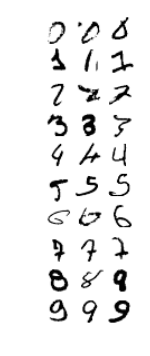

In [13]:
#Task8
image=None
for i in range(0,10):
    y_cur=np.where((answers==i)&(answers!=y_pred))[0]
    np.random.shuffle(y_cur)
    cur_image=None
    for j in range(0,3):
        if (cur_image is None):
            cur_image=test[y_cur[j]].reshape(28,28)
        else:
            cur_image=np.concatenate((cur_image,test[y_cur[j]].reshape(28,28)),axis=1)
    if (image is None):
        image=cur_image
    else:
        image=np.concatenate((image,cur_image),axis=0)
plt.axis("off")
plt.imshow(image,cmap='Greys')
plt.show()